---
title: Algorhythmic Experience Blog
description: This blog details some of my experiences at the Algorythmic Event as well as some code blocks to illustrate what each group showed. 
toc: true
layout: post
type: hacks
comments: true
---

# My Experience at the Algorythmic Event

Today (April 3), my group along with four other groups got to perform each of our sorting algorithms in front of the judges as well as people who happened to be interested in watching us perform. I enjoyed watching every single performance, as I was amazed at all of the groups were able to get creative with showing off their sorting algorithms in their own unique way. For example, the insertion sort algorithm performance was pretty cool in that it used rap lyrics as well as a beach theme in order to convey the mechanisms of insertion sort. Also, the bubble sort performance was funny to me and many others who attended the event since the theme was centered around a dating show and a person wanting to figure out who their best match is. 

In terms of our own performance, I thought that everyone (including me) did an amazing job. I feel like all of us were punctual whenever we were practicing, whether it was at lunch, during class, or outside of school. Ultimately, all of those practice sessions played of in the end, as we were able to perform on the stage without any issues and earned two 10/10s and 3 9/10s from the judges, which is quite amazing. We ended up in 3rd place for total scores, which we all agreed was a pretty solid ranking. 

We ended up posting our practice sessions on our Instagram account, which actually ended up earning a lot of followers and views (and most importantly, likes!)

Here are some captures of our practice sessions!

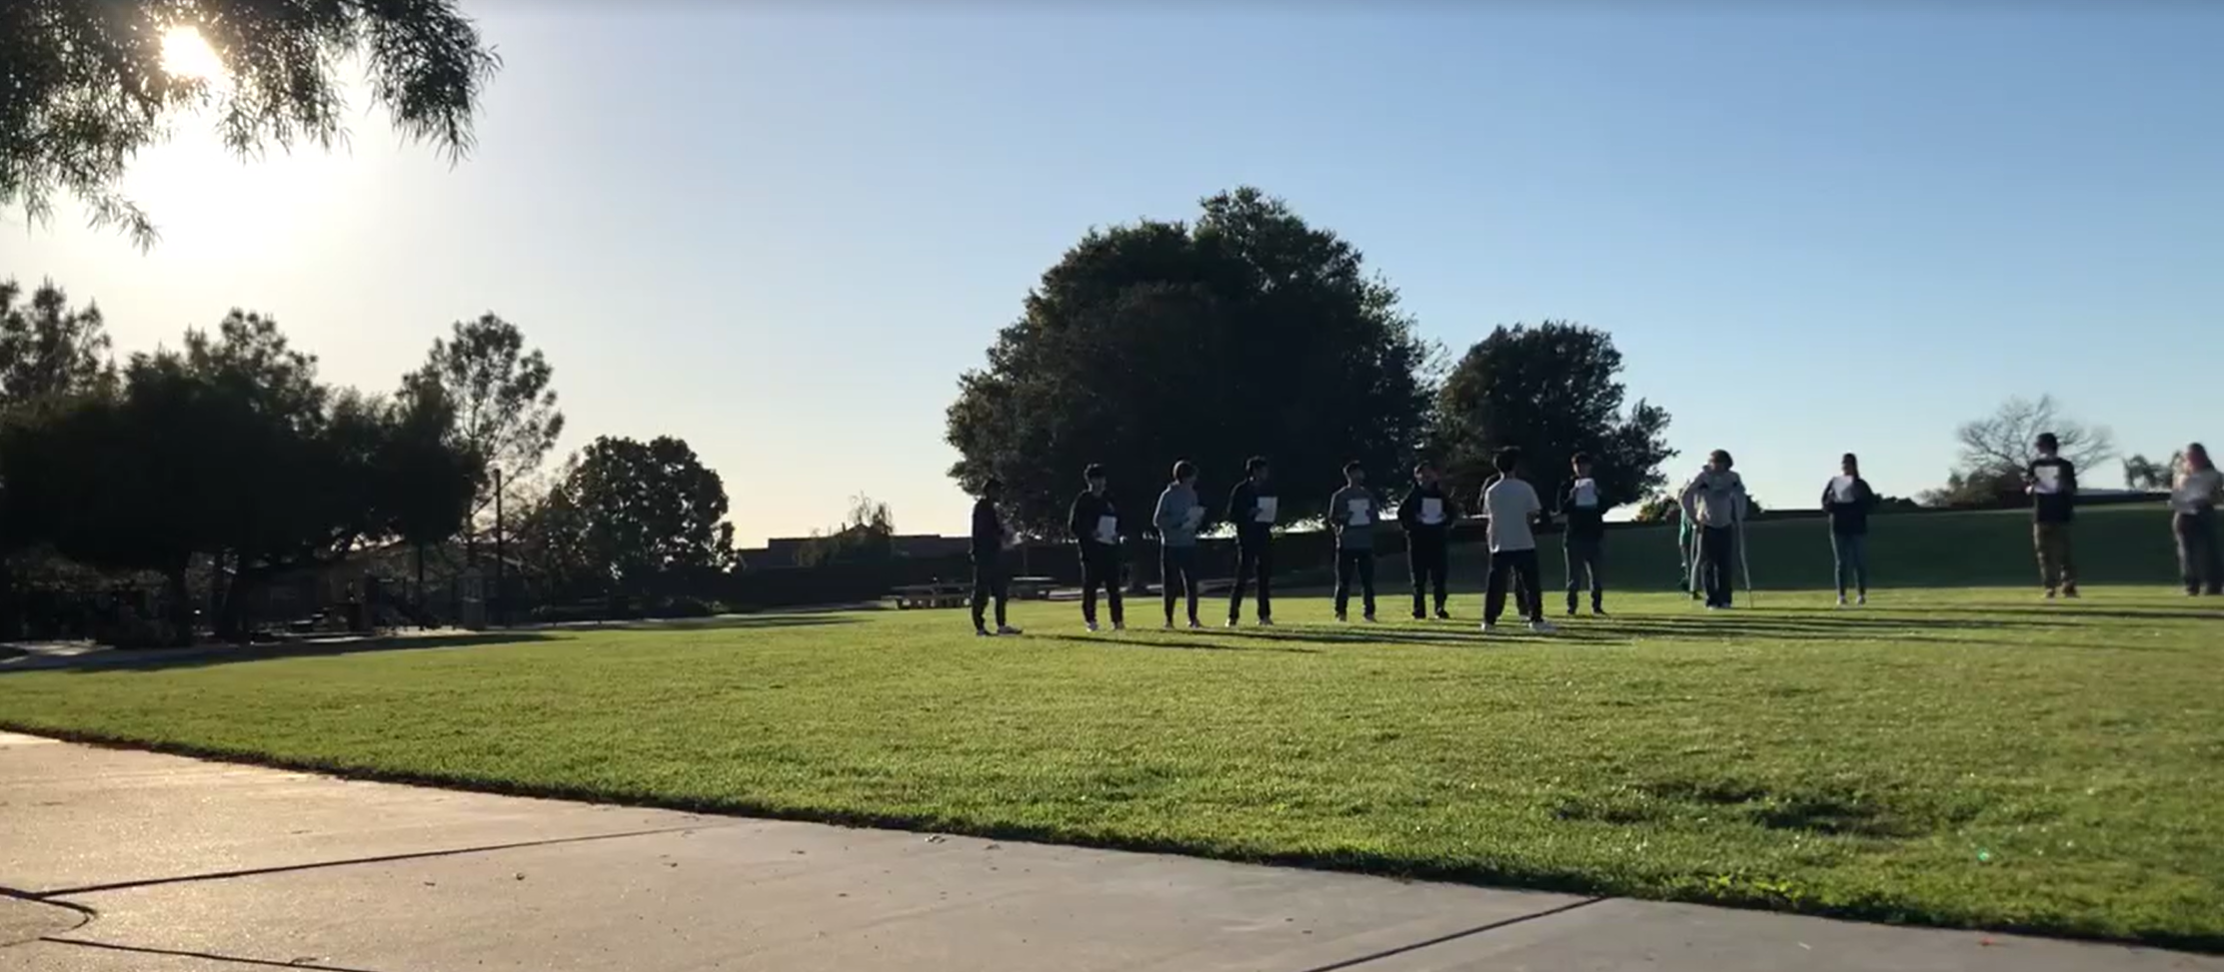
![]({{site.baseurl}}/images/IMG_0721.jpg)
![]({{site.baseurl}}/images/IMG_0722.jpg)
![]({{site.baseurl}}/images/betterimage.png)


Captures from the event 

![]({{site.baseurl}}/images/dating.png)
![]({{site.baseurl}}/images/dating2.png)
Dating show ^ (ft. Rachit aka Rachelina)

![]({{site.baseurl}}/images/performance.png)
![]({{site.baseurl}}/images/practice2.png)

# Actual Code for the Sorts

In [65]:
public abstract class Collectable implements Comparable<Collectable> {
    private String type;

    public interface KeyTypes {
        String name();
    }

    protected abstract KeyTypes getSortKey();
    protected abstract String getSortKeyValue();

    public Collectable(String type) {
        this.type = type;
    }

    public String getType() {
        return type;
    }

    protected String toJson() {
        // Basic JSON output to simulate serialization
        return String.format("{\"type\": \"%s\", \"key\": \"%s\", \"value\": \"%s\"}",
                             getType(), getSortKey().name(), getSortKeyValue());
    }

    @Override
    public String toString() {
        return toJson();
    }

    @Override
    public int compareTo(Collectable other) {
        return this.getSortKeyValue().compareTo(other.getSortKeyValue());
    }
}



In [68]:
public class Plant extends Collectable {
    private String species;
    private int leafCount;
    private String shade;

    public enum KeyType implements KeyTypes {
        SPECIES, LEAFCOUNT, SHADE
    }

    private KeyType sortKey = KeyType.LEAFCOUNT;

    public Plant(String species, int leafCount, String shade) {
        super("Plant");
        this.species = species;
        this.leafCount = leafCount;
        this.shade = shade;
    }

    public void setSortKey(KeyType key) {
        sortKey = key;
    }

    @Override
    protected KeyTypes getSortKey() {
        return sortKey;
    }

    @Override
    protected String getSortKeyValue() {
        switch (sortKey) {
            case LEAFCOUNT:
                return String.format("%03d", leafCount);
            case SHADE:
                return shade;
            default:
                return species;
        }
    }
}


## Sorting Class

In [61]:
public class SortingAlgorithms {
    // Bubble Sort
    public void bubbleSort(List<Collectable> list) {
        int n = list.size();
        for (int i = 0; i < n - 1; i++) {
            for (int j = 0; j < n - i - 1; j++) {
                if (list.get(j).compareTo(list.get(j + 1)) > 0) {
                    Collectable temp = list.get(j);
                    list.set(j, list.get(j + 1));
                    list.set(j + 1, temp);
                }
            }
        }
    }

    // Quick Sort
    public void quickSort(List<Collectable> list) {
        quickSortHelper(list, 0, list.size() - 1);
    }

    private void quickSortHelper(List<Collectable> list, int low, int high) {
        if (low < high) {
            int pi = partition(list, low, high);
            quickSortHelper(list, low, pi - 1);
            quickSortHelper(list, pi + 1, high);
        }
    }

    private int partition(List<Collectable> list, int low, int high) {
        Collectable pivot = list.get(high);
        int i = low - 1;
        for (int j = low; j < high; j++) {
            if (list.get(j).compareTo(pivot) < 0) {
                i++;
                Collectable temp = list.get(i);
                list.set(i, list.get(j));
                list.set(j, temp);
            }
        }
        Collectable temp = list.get(i + 1);
        list.set(i + 1, list.get(high));
        list.set(high, temp);
        return i + 1;
    }

    // Merge Sort
    public void mergeSort(List<Collectable> list) {
        if (list.size() > 1) {
            List<Collectable> left = new ArrayList<>(list.subList(0, list.size() / 2));
            List<Collectable> right = new ArrayList<>(list.subList(list.size() / 2, list.size()));
            mergeSort(left);
            mergeSort(right);
            merge(list, left, right);
        }
    }

    private void merge(List<Collectable> list, List<Collectable> left, List<Collectable> right) {
        int i = 0, j = 0, k = 0;
        while (i < left.size() && j < right.size()) {
            if (left.get(i).compareTo(right.get(j)) <= 0) {
                list.set(k++, left.get(i++));
            } else {
                list.set(k++, right.get(j++));
            }
        }
        while (i < left.size()) {
            list.set(k++, left.get(i++));
        }
        while (j < right.size()) {
            list.set(k++, right.get(j++));
        }
    }

    // Selection Sort
    public void selectionSort(List<Collectable> list) {
        int n = list.size();
        for (int i = 0; i < n; i++) {
            int minIdx = i;
            for (int j = i + 1; j < n; j++) {
                if (list.get(j).compareTo(list.get(minIdx)) < 0) {
                    minIdx = j;
                }
            }
            Collectable temp = list.get(i);
            list.set(i, list.get(minIdx));
            list.set(minIdx, temp);
        }
    }

    // Insertion Sort
    public void insertionSort(List<Collectable> list) {
        for (int i = 1; i < list.size(); i++) {
            Collectable key = list.get(i);
            int j = i - 1;
            while (j >= 0 && list.get(j).compareTo(key) > 0) {
                list.set(j + 1, list.get(j));
                j--;
            }
            list.set(j + 1, key);
        }
    }
}

## Main Class for All Sorts

In [75]:
import java.util.ArrayList;
import java.util.List;

public class Main {
    public static void main(String[] args) {
        List<Collectable> garden = new ArrayList<>();
        garden.add(new Plant("Fern", 50, "Green"));
        garden.add(new Plant("Cactus", 7, "Green"));
        garden.add(new Plant("Orchid", 21, "Purple"));
        garden.add(new Plant("Rose", 15, "Red"));
        garden.add(new Plant("Violet", 5, "Violet"));
        garden.add(new Plant("Sunflower", 12, "Yellow"));
        garden.add(new Plant("Daisy", 8, "White"));
        garden.add(new Plant("Tulip", 25, "Red"));
        garden.add(new Plant("Lily", 10, "White"));
        garden.add(new Plant("Jasmine", 4, "Yellow"));
        garden.add(new Plant("Marigold", 22, "Orange"));
        garden.add(new Plant("Poppy", 17, "Red"));
        garden.add(new Plant("Bluebell", 6, "Blue"));
        garden.add(new Plant("Iris", 19, "Blue"));
        garden.add(new Plant("Daffodil", 14, "Yellow"));

        SortingAlgorithms sorter = new SortingAlgorithms();
        runAllSorts(new ArrayList<>(garden), sorter);
    }

    private static void runAllSorts(List<Collectable> garden, SortingAlgorithms sorter) {

        for (Plant.KeyType key : Plant.KeyType.values()) {
            System.out.println("------------ Sort by " + key.name() + " ------------");
            
            // Displaying the list of all keys before sorting by the current key
            System.out.println("Before Sorting by " + key.name() + ":");
            for (Collectable plant : garden) {
                ((Plant) plant).setSortKey(key);
                System.out.println(plant);
            }
            System.out.println();
            
            sorter.bubbleSort(garden);
            System.out.println("After Bubble Sort:");
            garden.forEach(System.out::println);

            sorter.quickSort(garden);
            System.out.println("After Quick Sort:");
            garden.forEach(System.out::println);

            sorter.mergeSort(garden);
            System.out.println("After Merge Sort:");
            garden.forEach(System.out::println);

            sorter.selectionSort(garden);
            System.out.println("After Selection Sort:");
            garden.forEach(System.out::println);

            sorter.insertionSort(garden);
            System.out.println("After Insertion Sort:");
            garden.forEach(System.out::println);
        }
    }
}
Main.main(null);

------------ Sort by SPECIES ------------
Before Sorting by SPECIES:
{"type": "Plant", "key": "SPECIES", "value": "Fern"}
{"type": "Plant", "key": "SPECIES", "value": "Cactus"}
{"type": "Plant", "key": "SPECIES", "value": "Orchid"}
{"type": "Plant", "key": "SPECIES", "value": "Rose"}
{"type": "Plant", "key": "SPECIES", "value": "Violet"}
{"type": "Plant", "key": "SPECIES", "value": "Sunflower"}
{"type": "Plant", "key": "SPECIES", "value": "Daisy"}
{"type": "Plant", "key": "SPECIES", "value": "Tulip"}
{"type": "Plant", "key": "SPECIES", "value": "Lily"}
{"type": "Plant", "key": "SPECIES", "value": "Jasmine"}
{"type": "Plant", "key": "SPECIES", "value": "Marigold"}
{"type": "Plant", "key": "SPECIES", "value": "Poppy"}
{"type": "Plant", "key": "SPECIES", "value": "Bluebell"}
{"type": "Plant", "key": "SPECIES", "value": "Iris"}
{"type": "Plant", "key": "SPECIES", "value": "Daffodil"}

After Bubble Sort:
{"type": "Plant", "key": "SPECIES", "value": "Bluebell"}
{"type": "Plant", "key": "SPEC

# Explanations for All the Sorts

## Bubble Sort

The bubble sorting algorithm is an algorithm that compares two consecutive elements of a list. If the two elements (example numbers) are in the right order, nothing needs to be changed. If the numbers are not in the right order, however, they will then be swapped so that the smaller numbers can be "bubbled" to the top of the list.

Bubble sort gets the job done of sorting the list; however, it does have an average time complexity of O(n^2), meaning that the number of operations performed will get larger and larger as the list in question gets larger and larger. Thus, even though bubble sort is one of the more simpler algorithms to understand, it may not be the best option when it comes to sorting.



## Quick Sort

Quick sort selects one element of a list as a pivot. The list is then rearranged so that all elements less than the pivot come before it, while all elements greater than the pivot come after it. This process guarantees that the pivot element is in its correct position in the sorted list. Quick sort then recursively applies the same logic to the list of elements before the pivot and the list of elements after the pivot until the entire list is sorted.

Quick sort has an average time complexity of O(n log n), similar to merge sort. However, its worst-case performance is O(n^2), which occurs when the list is already nearly sorted or when the smallest or largest element is always chosen as the pivot. 

## Merge Sort

With the merge sorting algorithm, the algorithm takes one array and splits it in half. For each half of the array, the algorithm rearranges the array so that the elements are in the desired order. Once that has been done successfully, the algorithm merges the two arrays/lists back together so that the desired order is achieved for the entire array/list.

Merge sort, just like bubble sort, is also another way of sorting a list back into the desired order. However, merge sort is better than bubble sort in terms of time complexity, with merge sort having an average time complexity of O(nlogn). This means that the amount of operations performed will not be as large as the input size increases for a merge sort algorithm as it would be for a bubble sorting algorithm.

## Insertion Sort

Insertion sort builds the final sorted list one item at a time. It removes one element per iteration and finds the location it belongs within the sorted part of the list, inserting it there. This process repeats until no unsorted elements remain.

Even though insertion sort has an average and worst-case time complexity of O(n^2), making it less efficient for large lists, it has several advantages. It is adaptive, meaning that its efficiency increases if the list is already partially sorted, and it is stable, keeping identical elements in the same order as they appear in the input. 

## Selection Sort

Selection sort divides the list into two parts: the sorted part at the start and the unsorted part at the rest of the list. Initially, the sorted part is empty, and the unsorted part contains all the elements. With each iteration, the algorithm selects the minimum (or maximum, depending on sorting order) element from the unsorted part and moves it to the end of the sorted part. This process is repeated until the unsorted part becomes empty, and the list is sorted.

Selection sort has a time complexity of O(n^2), making it inefficient for large lists. The primary advantage of selection sort lies in its simplicity and the fact that it makes the minimum possible number of swaps: only one swap for each element in the list, which could be beneficial in scenarios where writing data is significantly more expensive than reading data. 